In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(42)

In [2]:
df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [4]:
# Create dataframe with all control records
control_df = df.query('group == "control"')

# Compute completion rate
control_cr = control_df['completed'].mean()

# Display completion rate
control_cr

0.37199519230769229

In [8]:
# Create dataframe with all experiment records
experiment_df = df.query('group =="experiment"')

# Compute completion rate
experiment_ctr = experiment_df['completed'].mean()

# Display completion rate
experiment_ctr

0.39353348729792148

In [9]:
# Compute observed difference in completion rates
obs_diff = experiment_ctr -control_cr

# Display observed difference in completion rates
obs_diff

0.02153829499022919

In [12]:
# Create sampling distribution for difference in completion rates
# with boostrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    bootstrap = df.sample(size, replace = True)
    bc = bootstrap.query('group == "control"')['completed'].mean()
    be = bootstrap.query('group == "experiment"')['completed'].mean()
    diff = be - bc
    diffs.append(diff)


In [13]:
# convert to numpy array
diffs = np.array(diffs)

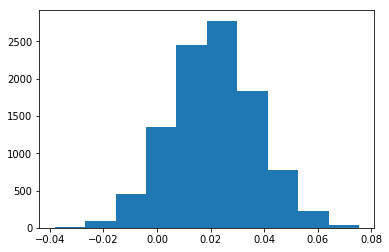

In [15]:
# plot distribution
plt.hist(diffs);

In [16]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0,diffs.std(),size)

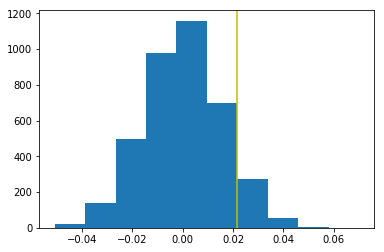

In [20]:
# plot null distribution
plt.hist(null_vals);

# plot line for observed statistic
plt.axvline(obs_diff, color= 'y');

In [22]:
# compute p value
(null_vals > obs_diff).mean()

0.088796030295116221